In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
simulator = QasmSimulator()

In [3]:
def build_qft_circuit(n_bits,input_qubits):
    circuit_qft = QuantumCircuit(n_bits, n_bits)
    for i in range(len(input_qubits)):
        print(i)
        if(input_qubits[i] == 1):
            circuit_qft.x(len(input_qubits)-1-i)
    circuit_qft.barrier()
    #print('inside construction circuit')
    for i in range(n_bits-1,0,-1):
        circuit_qft.h(i)
        for j in range(2,n_bits+1):
            #print(i,j,i-j+1)
            circuit_qft.cp((2*np.pi)/(2**j),i-j+1,i)
            if(i-j+1 == 0):
                break
        #print('end for j')
    circuit_qft.h(0)
    circuit_qft.barrier()
    #SWAP operation
    for i in range(0,int(n_bits/2)):
        circuit_qft.swap(i,n_bits-1-i)
    circuit_qft.barrier()
    return circuit_qft

In [4]:
def build_inv_qft_circuit(n_bits):
    circuit_qft = QuantumCircuit(n_bits, n_bits)
    circuit_qft.barrier()
    #SWAP operation
    for i in range(0,int(n_bits/2)):
        circuit_qft.swap(i,n_bits-1-i)
    circuit_qft.barrier()
    #print('inside construction circuit')
    circuit_qft.h(0)
    for i in range(1, n_bits):
        for j in range(2,i+2):
            #print(i,j,i-j+1)
            circuit_qft.cp((-2*np.pi)/(2**j),i-j+1,i)
            if(i-j+1 == 0):
                break
        #print('end for j')
        circuit_qft.h(i)
    circuit_qft.barrier()
    return circuit_qft

In [5]:
def build_inv_qft_circuit_2(circuit_qft, n_bits):
    #circuit_qft = QuantumCircuit(n_bits, n_bits)
    circuit_qft.barrier()
    #SWAP operation
#     for i in range(0,int(n_bits/2)):
#         circuit_qft.swap(i,n_bits-1-i)
#     circuit_qft.barrier()
    #print('inside construction circuit')
    circuit_qft.h(0)
    for i in range(1, n_bits):
        for j in range(2,i+2):
            #print(i,j,i-j+1)
            circuit_qft.cp((-2*np.pi)/(2**j),i-j+1,i)
            if(i-j+1 == 0):
                break
        #print('end for j')
        circuit_qft.h(i)
    circuit_qft.barrier()
    return circuit_qft

In [16]:
def phase_circuit(n_bits,phase):
    circuit_ph = QuantumCircuit(n_bits+1, n_bits)
    circuit_ph.x(n_bits)
    k=0
    for i in range(n_bits-1,-1,-1):
        circuit_ph.h(i)
        for j in range(0,2**k):
            circuit_ph.cp(2*np.pi*(phase),i,n_bits)
        k=k+1
    return circuit_ph

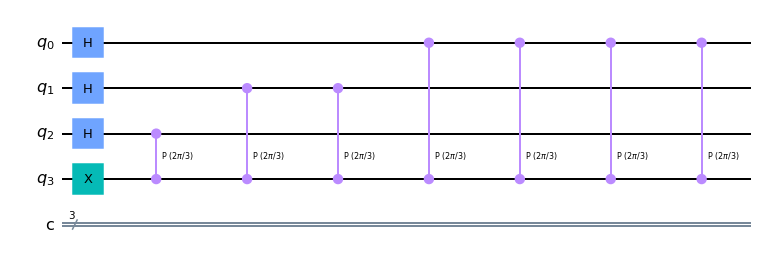

In [31]:
n_bits = 3
phase = 1/3
circuit_ph = phase_circuit(n_bits,phase)
circuit_ph.draw()

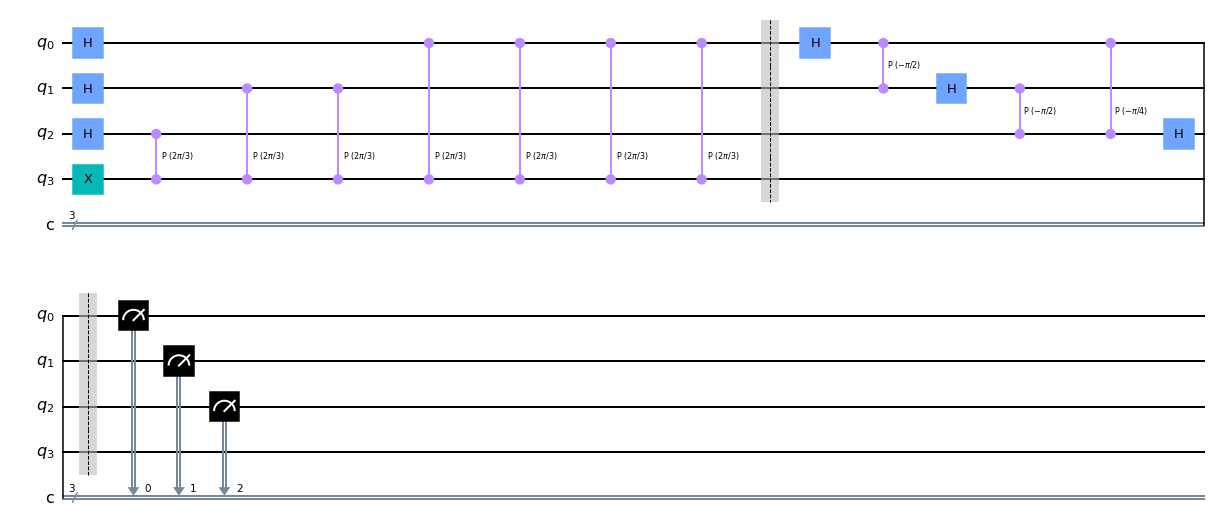

In [32]:
circuit_ph = build_inv_qft_circuit_2(circuit_ph, n_bits)
circuit_ph.measure(0, 0)
circuit_ph.measure(1, 1)
circuit_ph.measure(2, 2)
circuit_ph.draw()

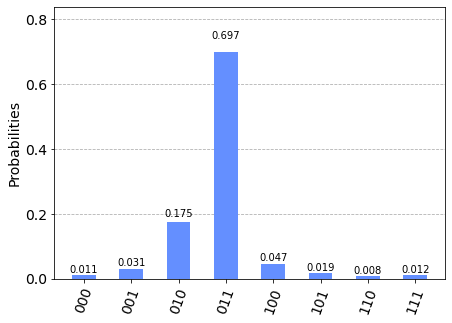

In [34]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(circuit_ph, qasm_sim)
qobj = assemble(t_qc)
results = qasm_sim.run(qobj, shots =1000).result()
counts = results.get_counts()
plot_histogram(counts)

In [35]:
# circuit_ph.measure(0, 0)
# circuit_ph.measure(1, 1)
# circuit_ph.measure(2, 2)
# circuit_qft_invqft.measure(3, 3)
# circuit_qft_invqft.measure(4, 4)

provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2  and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_lima


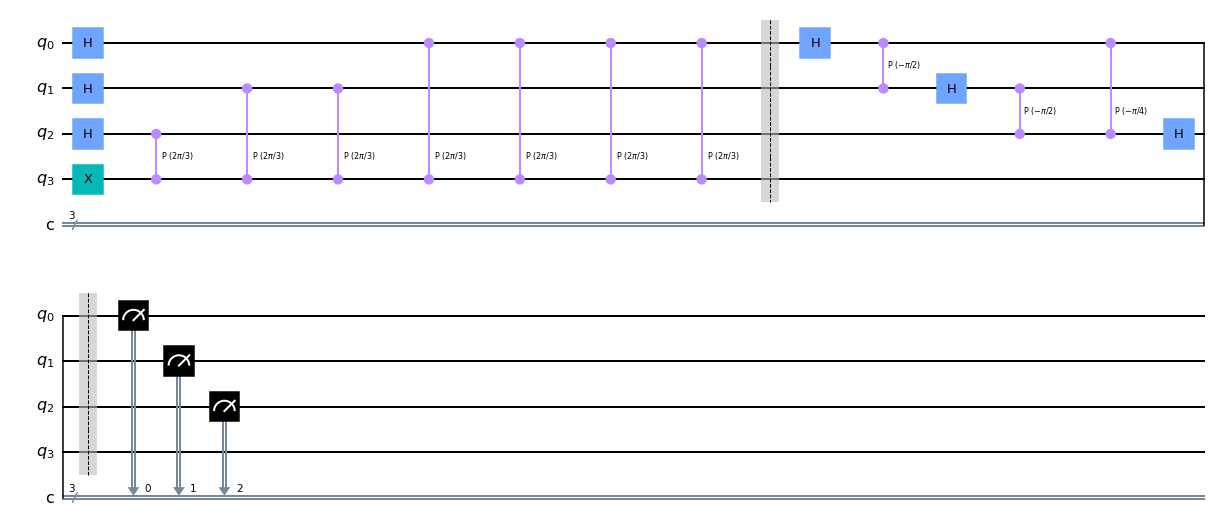

In [36]:
circuit_ph.draw()

In [37]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit = transpile(circuit_ph, backend, optimization_level=3)
qobj = assemble(transpiled_circuit, backend, shots=shots)
job = backend.run(qobj)
job_monitor(job, interval=2)

<ipython-input-37-99d5b0359140>:6: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


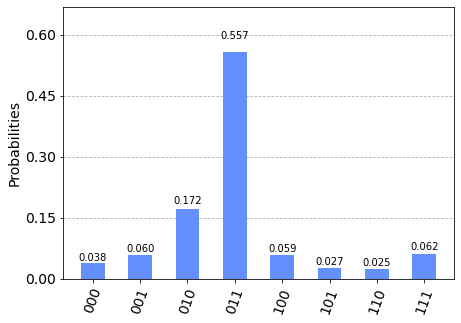

In [38]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)